### **Random Search**

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2025-02-14 07:49:02 +07:00)


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

time: 0 ns (started: 2025-02-14 08:55:02 +07:00)


In [3]:
X, y = make_classification(n_samples=300, n_features=50,
                           n_informative=10,
                           n_redundant=25, n_repeated=15,
                           n_clusters_per_class=5,
                           flip_y=0.05, class_sep=0.5,
                           random_state=0)

time: 16 ms (started: 2025-02-14 08:57:04 +07:00)


**What does `make_classification` do?**

**`make_classification`** is a function from the **scikit-learn (sklearn.datasets)** that generates a synthetic classification dataset. 

It allows for detailed control over the dataset structure, such as the number of features, informative/redundant/repeated features, class separation, noise level, and cluster distribution.

This is particularly useful for testing and benchmarking classification algorithms as we can create datasets with specific properties to evaluate model performance under controlled conditions.

<center>

| **Parameters** | **Description** |
| ------- | -----|
|  `n_samples=300` | Generates **300 samples (rows)** in the dataset. Each sample belongs to a class (binary by default) |
| `n_features=50` | The dataset has **50 total features (columns). These include informative, redundant and repeated features. | 
| `n_informative=10` | **10 features** contain real, meaningful information that helps differentiate classes. These are **linearly combined** to create the target variable ( `y` ) | 
| 
|`n_redundant=25` | **25 features** are generated as **linear combinations** of the informative features. These features do not add new information but are correlated with informative features. |
| `n_repeated=15` | **15 features** are **duplicates** of previous features (either informative or redundant). These do not add new information to the dataset |
| `n_clusters_per_class=5` | Each class is formed by **5 clusters** in feature space, meaning data points belonging to the same class are grouped into multiple sub-clusters. This increases complexity. |
| `flip_y=0.05` | **5% of labels are randomly flipped** to introduce some label noise.  This simulates real-world data, which often has mislabeled instances $\rightarrow$ making the classification problem more realistic. | 
| `class_sep=0.5` | Controls the **separability between classes**. A lower value (like **0.5**) makes classes overlap more or classes are close together, making classification harder. A higher value (e.g., 2.0) would create well-separated classes or makes classes more distinct. |
| `random_state=0` | Sets a random seed to ensure reproducibility. Using the same seed will always generate the same dataset. |  

</center>

---

**How the Generated Dataset Looks?**

$\quad X: A(n\_samples, n\_features) = A(300, 50)$ - **Numpy array where each row represents a sample with 50 features**.
$\quad Y: A(n\_samples,) = A(300,)$ - **Numpy array containing class labels (0 or 1)**.

---

**What happens internally?**
1. The function first generates **10 informative features**, which contribute to the class labels.
2. It then create **25 redundant features**, which are linear combinations of the **informative features**.
3. Next, **15 repeated features** are created by duplicating some existing features.
4. The function groups data into **5 clusters per class**, adding complexity.
5. Finally, it **randomly flips 5% of the labels** to simulate noisy real-word data.

--- 

**When use `make_classification`?**
- When testing different classification algorithms in a controlled environment.
- When analyzing feature importance and how redundant/repeated features affect performance.
- When experimenting with class separability and noise to evaluate model robustness. 

In [ ]:
from sklearn.utils.fixes import loguniform
from sklearn import svm
from sklearn import model_selection

svc = svm.SVC()
svc = svm.SVC(probability=True, random_state=1)

search_space_dict = {'kernel': ['linear', 'rbf'],
                     'C': loguniform(1, 1000),
                     'gamma': loguniform(0.0001, 0.1)
                    }

scorer = 'accuracy'

search_func = model_selection.RandomizedSearchCV(estimator=svc, param_distributions=search_space_dict, n_iter=10, scoring=scorer, n_jobs=-1, cv=5)

**What is `loguniform`?**

**`loguniform(a, b)`** is a distribution that samples values exponentially between `a` and `b`.

- Unlike a **uniform distribution**, which **gives equal weight to all values**, **`loguniform`** is useful when hyperparameters span multiple orders of magnitude.

- It **avoids biasing the search towards larger numbers** and ensures a balanced selection across different scales.

<center>

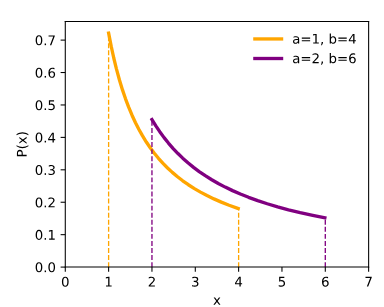

</center>

**Example:**

If use **`loguniform(1, 1000)`**, instead of selecting numbers linearly like **`[1, 100, 200, ... , 1000]`**, it samples values logarithmically, favoring lower and mid-range values like **`[1, 10, 100, 500, 1000]`**


## **What are Support Vector Machine (SVM) and Support Vector Classifier (SVC)?**

<center>

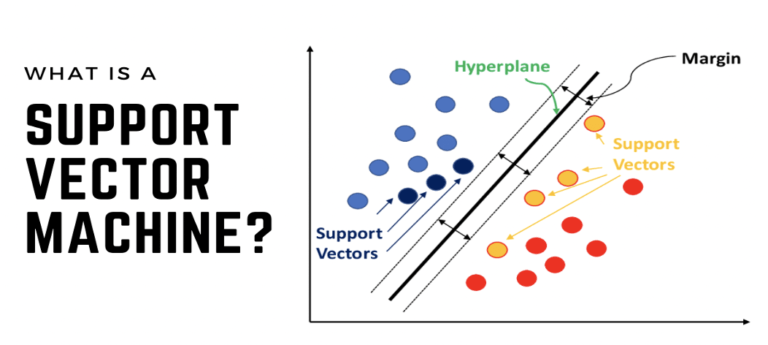

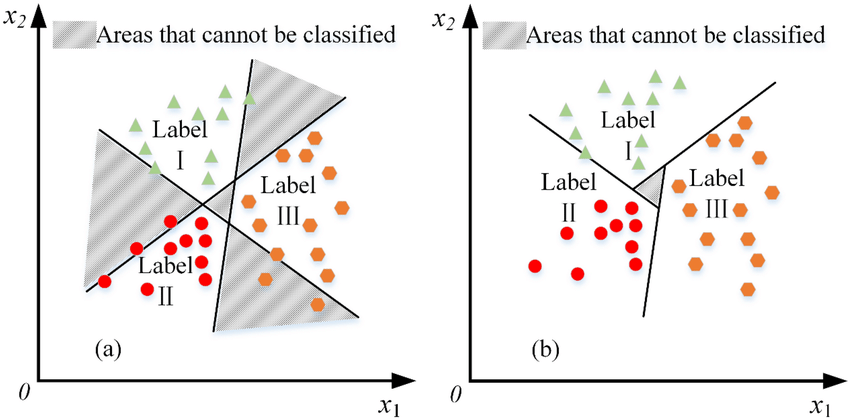

</center>

### **What is SVM (Support Vector Machine)?**

Support Vector Machine (SVM) is a **powerful supervised learning algorithm** used for **classification** and **regression**. It works by finding the best / optimal **decision boundary (hyperplane)** that separates different classes in a dataset.

SVM is widely used in:

🖼️ **Image classification** (e.g., digit recognition, facial recognition, medical imaging, object detection, handwriting)

💬 **Text classification** (e.g., spam detection, sentiment analysis)

🧬 **Bioinformatics** (e.g., disease classification from genetic data, gene classification)

🕵️ **Anomaly Detection** (e.g., fraud detection, cybersecurity)

**Goal of SVM**: Find a hyperplane that best separates different classes with **the maximum margin**.

**When to use SVM?**
- When the dataset is small to medium-sized
- When high-dimensional data is involved
- When computational efficiency is a concern (compared to deep learning)


### **What are Hyperplanes, Margins and Support Vectors?**

✈️ **Hyperplane**
- A **hyperplane** is a boundary that separates different classes.
- In **2D space**, it's a **line**.
- In **3D space**, it's a **plane**.
- In **higher dimensions**, it's a more complex shape.

🚀 **Margin**
- The **margin** is the distance between the hyperplane and the closest data points (support vectors).
- SVM tried to **maximize** this margin to improve classification performance.

🔍 **Support Vectors**
- The **support vectors** are the data points that are closest to the decision boundary.
- These points **determine** the position of the hyperplane.
- If these points change, the hyperphane changes too!

$\Rightarrow$ The SVM algorithm finds the best **straight line** that separates them **while keeping the margin as large as possible**.

🚀 **Why maximize the margin?**
- Large margins = better generalization (good on new data)
- Small margin = overfitting (too specific to training data)

### **Hard Margin vs Soft Margin SVM**
There are 2 types of SVM based on how strict we want the separation to be:

👍 **Hard Margin SVM**
- **Strictly** separates classes with a hard boundary
- NO misclassified points are allowed
- **Works well for perfectly separable data** 
- **Problem?** It **fails** if the data was **overlapping classes** or **noise**

👍 **Soft Margin SVM**
- Allows **some misclassifications**
- Uses a parameter **C** to control the trade-off between **margin size** and **misclassification**
- **Better for real-world data**, where perfect separation is not possible $\Rightarrow$ It balances model flexibility and accuracy

### **What is SVC (Support Vector Classifier)?**

SVC (**Support Vector Classifier**) is the classification version of SVM. It supports different **kernel functions** and allows hyperparameter tuning using **GridSearchCV** to optimize **C and gamma** for better accuracy.

- It uses **SVM principles** to classify data points into different categories
- It can handle **both linear and non-linear classification**
- **`sklearn.svm.SVC()`** is used to implement it in Python

### **SVC Hyperparameter**

📌 **`kernel`** - defines how data is transformed

SVC supports different **kernel functions** that transform data into a higher-dimensional space to make it separable.

1️⃣ **Linear Kernel** (**`kernel='linear'`**)
- Best for linearly separable data
- Find a straight-line decision boundary
- Example: Spam vs. Non-spam emails

2️⃣ **Polynomial Kernel** (**`kernel='poly'`**)
- Maps features using polynomial transformations
- Useful for data with polynomial relationships
- Example: Handwriting recognition

3️⃣ **Radial Basis Function (RBF) Kernel** (**`kernel='rbf'`**)
- Best for **non-linear** data
- Transforms data into higher dimensions
- Use **Gaussian functions** to separate complex patterns
- Example: Facial recognition, medical diagnosis

4️⃣ **Sigmoid Kernel** (**`kernel='sigmoid'`**)
- Similar to neural networks
- Less commonly used

📌 **`C`** – regularization parameter

**Controls** how much SVC **allows misclassification**

- **High `C`** (e.g., 1000) $\rightarrow$ less margin, fewer misclassifications (risk of overfitting)
- **Low `C`** (e.g., 1) $\rightarrow$ more margin, allow misclassification (better generalization)

🔎 Think of **`C`** like this:

If **`C`** is **very high**, the model **focuses on classifying every point correctly**, even if the decision boundary is complicated (risk of overfitting).

If **`C`** is **low**, the model **allows some misclassifications**, creating a smoother boundary (better generalization).

📌 **`gamma`** – controls the influence of points in **`RBF`** kernel

Only used in **RBF** and **polynomial** kernels

- High **gamma** $\rightarrow$ points have a wider influence, creating **complex** boundaries (risk of overthinking)
- Low **gamma** $\rightarrow$ points have a narrow influence, creating a **smoother** boundary (better generalization)

📌 How to tune **`gamma`**?

Start with **`auto`** or **`scale`** and then fine-tune using Grid Search or Random Search.

### **How SVM works?**
1. It **maps** the input data into **a higher-dimensional space** using kernels (e.g., **`linear`**, **`RBF`**).
2. It finds **the optimal hyperplane** that **maximizes the margin** between classes.
3. Some **misclassifications are allowed** based on **`C`** to balance flexibility and accuracy.
4. If the data is **not linearly separable**, **`kernels`** like **`RBF`** transform it into a higher-dimensional space where it is separable.

### **Conclusion**
SVM remains a powerful tool in machine learning due to its ability to generalize well, handle high-dimensional data, and provide robust classification boundaries. However, for extremely large datasets or overlapping classes, deep learning or ensemble methods may perform better.

Read more: <a href='https://serokell.io/blog/support-vector-machine-algorithm'>Support Vector Machine Algorithm</a>

**Define the Support Vector Classifier (SVC)**

```Python
svc = svm.SVC()
svc = svm.SVC(probability=True, random_state=1)
```

**`probability=True`** - enables probability estimation, meaning **`predict_proba()`** can be used to get class probabilities (useful for models requiring probability outputs)
